In [1]:
from data_harvesting import Harvesting
from cnn import CNN
# from iireinforcement import Agent
# from iitrading_strategy import Strategy
% matplotlib inline

/home/apurvnit/anaconda3/lib/python3.5/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# sample harvested data
hr = Harvesting()
df = hr.load_data()
print(len(df))
df.head()

4697


,date,open,high,low,close,volume
0,03-01-00,1469.250000,1478.000000,1438.359985,1455.219971,931800000
1,04-01-00,1455.219971,1455.219971,1397.430054,1399.420044,1009000000
2,05-01-00,1399.420044,1413.270020,1377.680054,1402.109985,1085500000
3,06-01-00,1402.109985,1411.900024,1392.099976,1403.449951,1092300000
4,07-01-00,1403.449951,1441.469971,1400.729980,1441.469971,1225200000


In [10]:
X, Y = hr.split_into_chunks(49,1,1)
X_train, X_test, Y_train, Y_test = Harvesting.data_split(X, Y)

total chunks  4647
each chunk contains 49
saving to data/data1.csv


### Define model

In [11]:
input_shape=X_train[0].shape
output_shape=1
cnn_model = CNN(layers=[
            {
                'type': 'sepconv1D',
                'args': {
                    'filters': 25,
                    'kernel_size': 4,
                    'activation': 'relu',
                    'input_shape': input_shape
                }
            },
            {
                'type': 'maxpool1D',
                'args': {
                    'pool_size': 2
                }
            },
            {
                'type': 'conv1D',
                'args': {
                    'filters': 32,
                    'kernel_size': 3,
                    'activation': 'relu'
                }
            },
            {
                'type': 'maxpool1D',
                'args': {
                    'pool_size': 2
                }
            },
            {
                'type': 'dropout',
                'args': {
                    'ratio': 0.15
                }
            },
            {
                'type': 'flatten',
                'args': None
            },
            {
                'type': 'dropout',
                'args': {
                    'ratio': 0.2
                }
            },
            {
                'type': 'activation',
                'args': {
                    'function': 'relu'
                }
            },
            {
                'type': 'dense',
                'args': {
                    'output': 8
                }
            },
            {
                'type': 'dense',
                'args': {
                    'output': output_shape
                }
            }
        ])
cnn_model.build_model()
# model.compile_model()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
separable_conv1d_2 (Separabl (None, 46, 25)            54        
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 23, 25)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 21, 32)            2432      
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 10, 32)            0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 10, 32)            0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 320)               0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 320)               0         
__________

In [12]:
cnn_model.compile_model()

In [13]:
history = cnn_model.fit_model(X_train, Y_train, epochs=100,shuffle=False,batch_size=32, validation_split=0.3)

Train on 2927 samples, validate on 1255 samples
Epoch 1/100
2927/2927 [==============================] - 1s 185us/step - loss: 0.1632 - mean_absolute_error: 0.2470 - val_loss: 0.0140 - val_mean_absolute_error: 0.0880
Epoch 2/100
2927/2927 [==============================] - 0s 121us/step - loss: 0.0352 - mean_absolute_error: 0.1366 - val_loss: 0.0115 - val_mean_absolute_error: 0.0794
Epoch 3/100
2927/2927 [==============================] - 0s 125us/step - loss: 0.0284 - mean_absolute_error: 0.1241 - val_loss: 0.0115 - val_mean_absolute_error: 0.0805
Epoch 4/100
2927/2927 [==============================] - 0s 125us/step - loss: 0.0258 - mean_absolute_error: 0.1180 - val_loss: 0.0112 - val_mean_absolute_error: 0.0807
Epoch 5/100
2927/2927 [==============================] - 0s 125us/step - loss: 0.0242 - mean_absolute_error: 0.1141 - val_loss: 0.0114 - val_mean_absolute_error: 0.0790
Epoch 6/100
2927/2927 [==============================] - 0s 123us/step - loss: 0.0257 - mean_absolute_error

2927/2927 [==============================] - 0s 147us/step - loss: 0.0170 - mean_absolute_error: 0.0952 - val_loss: 0.0097 - val_mean_absolute_error: 0.0720
Epoch 49/100
2927/2927 [==============================] - 0s 158us/step - loss: 0.0168 - mean_absolute_error: 0.0959 - val_loss: 0.0090 - val_mean_absolute_error: 0.0694
Epoch 50/100
2927/2927 [==============================] - 0s 162us/step - loss: 0.0164 - mean_absolute_error: 0.0939 - val_loss: 0.0088 - val_mean_absolute_error: 0.0698
Epoch 51/100
2927/2927 [==============================] - 0s 163us/step - loss: 0.0162 - mean_absolute_error: 0.0941 - val_loss: 0.0088 - val_mean_absolute_error: 0.0708
Epoch 52/100
2927/2927 [==============================] - 0s 155us/step - loss: 0.0161 - mean_absolute_error: 0.0945 - val_loss: 0.0091 - val_mean_absolute_error: 0.0718
Epoch 53/100
2927/2927 [==============================] - 0s 160us/step - loss: 0.0160 - mean_absolute_error: 0.0924 - val_loss: 0.0089 - val_mean_absolute_error: 

Epoch 95/100
2927/2927 [==============================] - 0s 142us/step - loss: 0.0157 - mean_absolute_error: 0.0912 - val_loss: 0.0079 - val_mean_absolute_error: 0.0657
Epoch 96/100
2927/2927 [==============================] - 0s 143us/step - loss: 0.0154 - mean_absolute_error: 0.0900 - val_loss: 0.0085 - val_mean_absolute_error: 0.0664
Epoch 97/100
2927/2927 [==============================] - 0s 139us/step - loss: 0.0158 - mean_absolute_error: 0.0919 - val_loss: 0.0084 - val_mean_absolute_error: 0.0655
Epoch 98/100
2927/2927 [==============================] - 0s 151us/step - loss: 0.0154 - mean_absolute_error: 0.0910 - val_loss: 0.0088 - val_mean_absolute_error: 0.0668
Epoch 99/100
2927/2927 [==============================] - 0s 142us/step - loss: 0.0145 - mean_absolute_error: 0.0876 - val_loss: 0.0082 - val_mean_absolute_error: 0.0674
Epoch 100/100
2927/2927 [==============================] - 0s 142us/step - loss: 0.0150 - mean_absolute_error: 0.0901 - val_loss: 0.0080 - val_mean_ab

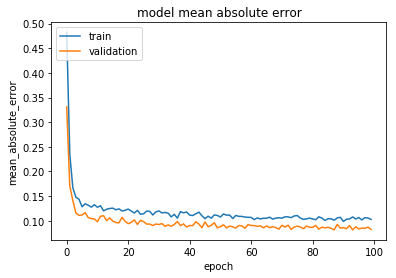

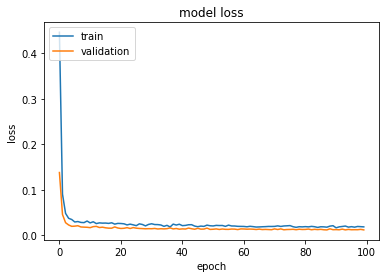

In [7]:
cnn_model.visualise_history()

92/92 [==============================] - 0s 193us/step
model loss - 0.007497 
 model mean absolute error - 0.070848


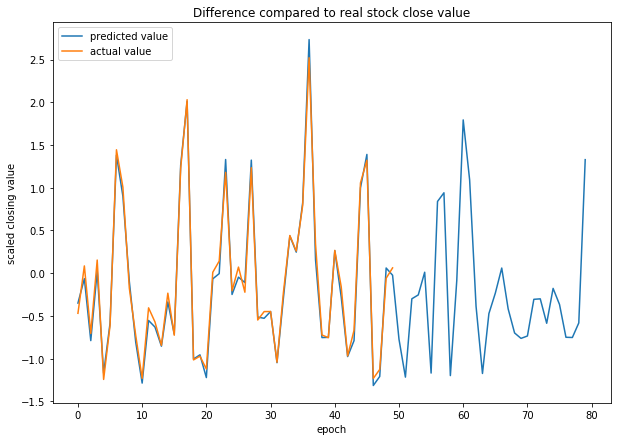

In [8]:
cnn_model.evaluate(X_test, Y_test)

In [9]:
cnn_model.save_model()

### As we can see the above graph is not totally accurate but it is able to learn the trend i.e. the stock is gonna go up or down . 